# CARDIOVASCULAR DISEASE DATA WRANGLING

Author: Khrystyna Vasko
student_id: 12307779

Import all the libraries:
Dataset description:


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

print("✓ Libraries imported successfully")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ NumPy version: {np.__version__}")

✓ Libraries imported successfully
✓ Pandas version: 2.3.3
✓ NumPy version: 2.3.3


In [14]:
DATA_PATH = 'data/raw/cardio_train.csv'
OUTPUT_DIR = 'outputs'
MODELS_DIR = 'models'

# Cleaning thresholds
THRESHOLDS = {
    'bp_systolic': (50, 250),      # mmHg
    'bp_diastolic': (40, 150),     # mmHg
    'height': (130, 220),          # cm
    'weight': (30, 200)            # kg
}

# Feature engineering parameters
BMI_BINS = [0, 18.5, 25, 30, 100]
BMI_LABELS = ['Underweight', 'Normal', 'Overweight', 'Obese']

AGE_BINS = [0, 40, 50, 60, 100]
AGE_LABELS = ['<40', '40-50', '50-60', '60+']

# Label mappings
GENDER_MAP = {1: 'Female', 2: 'Male'}
CHOL_MAP = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}
GLUC_MAP = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}

print("✓ Configuration complete")
print(f"✓ Data source: {DATA_PATH}")
print(f"✓ Output directory: {OUTPUT_DIR}")

✓ Configuration complete
✓ Data source: data/raw/cardio_train.csv
✓ Output directory: outputs


In [15]:
print("="*70)
print("PHASE 1: DATA LOADING & INSPECTION")
print("="*70)

# Load the dataset
df = pd.read_csv(DATA_PATH, delimiter=';')

print(f"\n✓ Dataset loaded successfully")
print(f"✓ Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"✓ Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

PHASE 1: DATA LOADING & INSPECTION

✓ Dataset loaded successfully
✓ Shape: 70,000 rows × 13 columns
✓ Memory usage: 6.94 MB


In [16]:
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [17]:
# Descriptive statistics
print("\n📈 Descriptive Statistics:")
df.describe()


📈 Descriptive Statistics:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data Quality check


In [18]:
print("\n🔍 Data Quality Check:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

print("\n✓ Columns:")
for col in df.columns:
    print(f"  • {col:15s} - {df[col].dtype}")


🔍 Data Quality Check:
Missing values: 0
Duplicate rows: 0

✓ Columns:
  • id              - int64
  • age             - int64
  • gender          - int64
  • height          - int64
  • weight          - float64
  • ap_hi           - int64
  • ap_lo           - int64
  • cholesterol     - int64
  • gluc            - int64
  • smoke           - int64
  • alco            - int64
  • active          - int64
  • cardio          - int64



 Age Analysis:
  Range: 29.6 - 64.9 years
  Mean: 53.3 years
  Median: 53.9 years


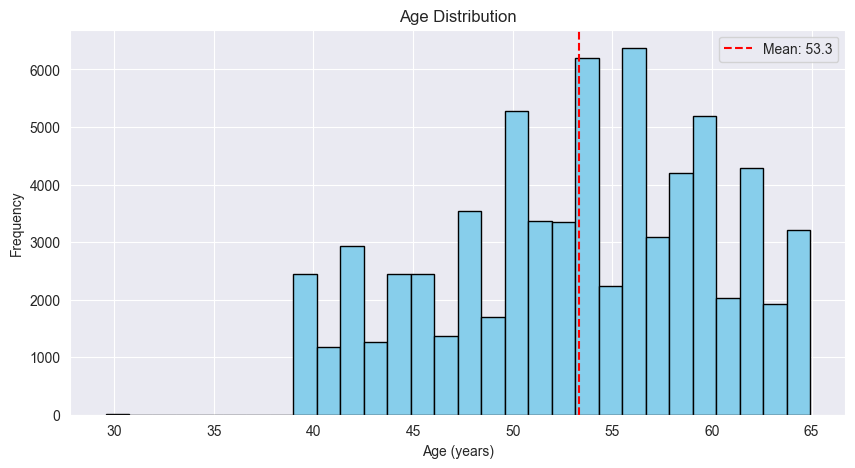

In [19]:
# Converted age from days to years for better understanding
df_temp = df.copy()
df_temp['age_years'] = df_temp['age'] / 365.25

print("\n Age Analysis:")
print(f"  Range: {df_temp['age_years'].min():.1f} - {df_temp['age_years'].max():.1f} years")
print(f"  Mean: {df_temp['age_years'].mean():.1f} years")
print(f"  Median: {df_temp['age_years'].median():.1f} years")

# Visualization of the age distribution
plt.figure(figsize=(10, 5))
plt.hist(df_temp['age_years'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.axvline(df_temp['age_years'].mean(), color='red', linestyle='--', label=f'Mean: {df_temp["age_years"].mean():.1f}')
plt.legend()
plt.show()


 Cardiovascular Disease Distribution:
  No disease (0): 35,021 (50.0%)
  Disease (1):    34,979 (50.0%)


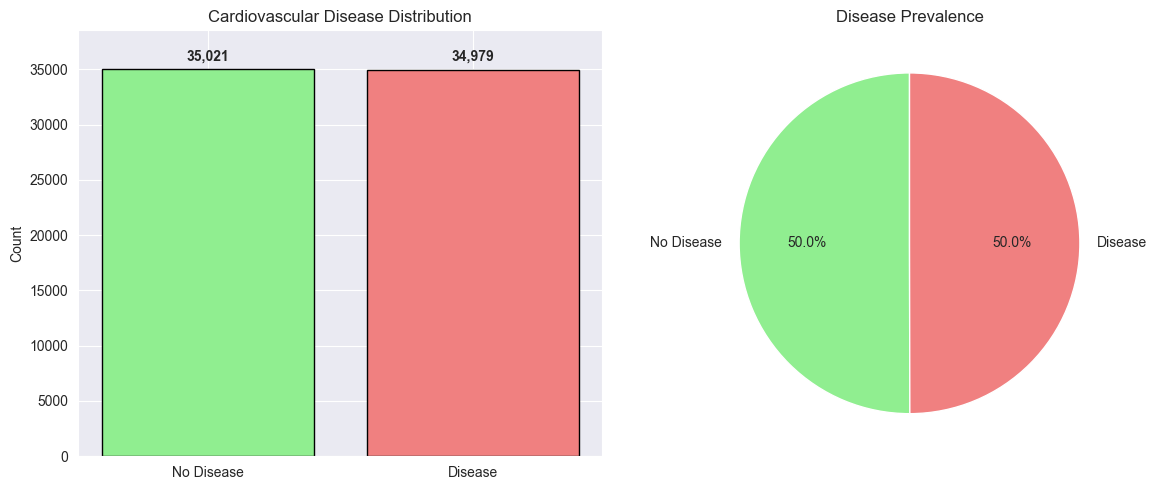

In [20]:
# cardiovascular disease distribution
print("\n Cardiovascular Disease Distribution:")
cardio_counts = df['cardio'].value_counts()
print(f"  No disease (0): {cardio_counts[0]:,} ({cardio_counts[0]/len(df)*100:.1f}%)")
print(f"  Disease (1):    {cardio_counts[1]:,} ({cardio_counts[1]/len(df)*100:.1f}%)")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
ax1.bar(['No Disease', 'Disease'], cardio_counts.values, color=['lightgreen', 'lightcoral'], edgecolor='black')
ax1.set_ylabel('Count')
ax1.set_title('Cardiovascular Disease Distribution')
ax1.set_ylim(0, max(cardio_counts.values) * 1.1)

for i, v in enumerate(cardio_counts.values):
    ax1.text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2.pie(cardio_counts.values, labels=['No Disease', 'Disease'], autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'], startangle=90)
ax2.set_title('Disease Prevalence')

plt.tight_layout()
plt.show()

PHASE 2: DATA QUALITY CHECK

📋 Categorical Variables Validation:
  Gender (should be 1 or 2):
    Valid values: [2 1]
    Invalid entries: 0

  Cholesterol (should be 1, 2, or 3):
    Valid values: [1 3 2]
    Invalid entries: 0

  Glucose (should be 1, 2, or 3):
    Valid values: [1 2 3]
    Invalid entries: 0

  Smoke (should be 0 or 1):
    Valid values: [0 1]
    Invalid entries: 0

  Alco (should be 0 or 1):
    Valid values: [0 1]
    Invalid entries: 0

  Active (should be 0 or 1):
    Valid values: [1 0]
    Invalid entries: 0

  Cardio (should be 0 or 1):
    Valid values: [0 1]
    Invalid entries: 0

🩺 Blood Pressure Analysis:

  Method 1: Clinical Thresholds
    Systolic BP (ap_hi):
      Range: -150 - 16020 mmHg
      Below 50: 188 (0.27%)
      Above 250: 40 (0.06%)

    Diastolic BP (ap_lo):
      Range: -70 - 11000 mmHg
      Below 40: 59 (0.08%)
      Above 150: 975 (1.39%)

  Method 2: IQR (Interquartile Range) Method
    ap_hi:
      Q1: 120.0, Q3: 140.0, IQR: 20.0
 

C:\Users\Acer\AppData\Local\Temp\ipykernel_4792\485079206.py:145: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp_box = axes[1, 0].boxplot(bp_data, labels=bp_labels, patch_artist=True)


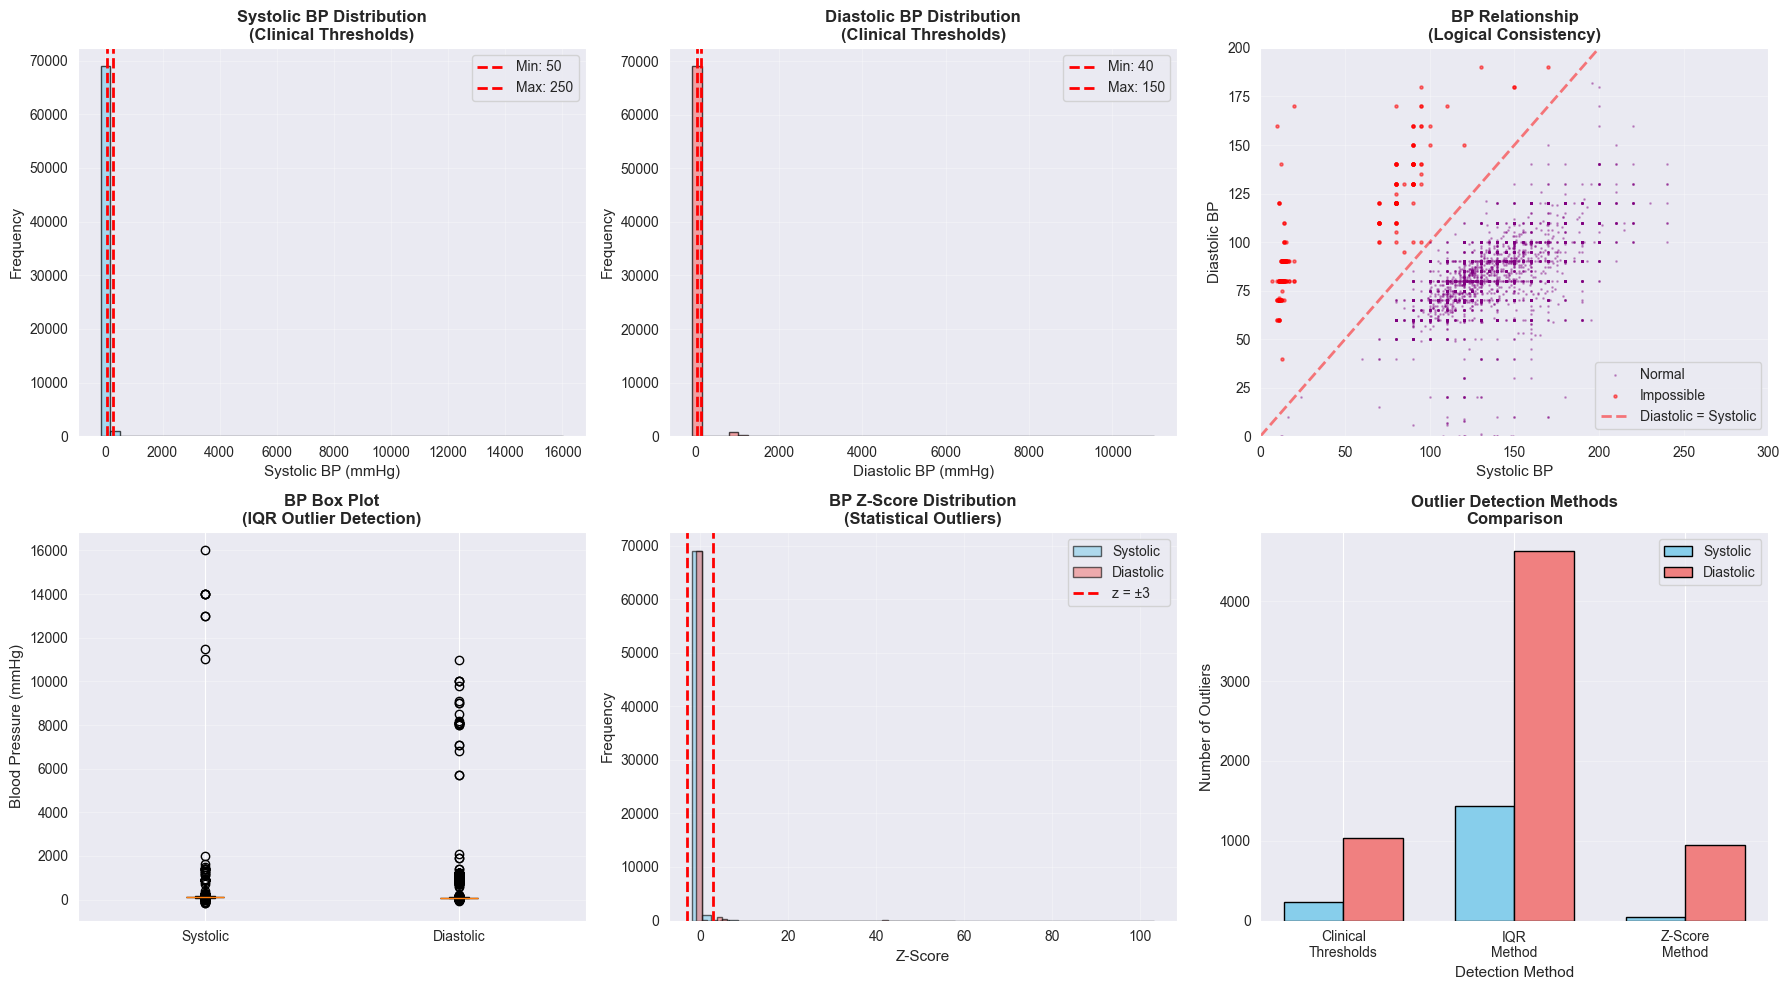

In [21]:
# ============================================================================
# PHASE 2: DATA QUALITY CHECK - COMPREHENSIVE ANALYSIS
# ============================================================================

print("="*70)
print("PHASE 2: DATA QUALITY CHECK")
print("="*70)

# Initialize quality issues dictionary
quality_issues = {}

# ============================================================================
# 2.1 CATEGORICAL VARIABLES VALIDATION
# ============================================================================
print("\n📋 Categorical Variables Validation:")

# Gender check (should be 1 or 2)
gender_invalid = df[~df['gender'].isin([1, 2])]
quality_issues['gender_invalid'] = len(gender_invalid)
print(f"  Gender (should be 1 or 2):")
print(f"    Valid values: {df['gender'].unique()}")
print(f"    Invalid entries: {quality_issues['gender_invalid']}")

# Cholesterol check (should be 1, 2, or 3)
chol_invalid = df[~df['cholesterol'].isin([1, 2, 3])]
quality_issues['cholesterol_invalid'] = len(chol_invalid)
print(f"\n  Cholesterol (should be 1, 2, or 3):")
print(f"    Valid values: {df['cholesterol'].unique()}")
print(f"    Invalid entries: {quality_issues['cholesterol_invalid']}")

# Glucose check (should be 1, 2, or 3)
gluc_invalid = df[~df['gluc'].isin([1, 2, 3])]
quality_issues['gluc_invalid'] = len(gluc_invalid)
print(f"\n  Glucose (should be 1, 2, or 3):")
print(f"    Valid values: {df['gluc'].unique()}")
print(f"    Invalid entries: {quality_issues['gluc_invalid']}")

# Binary variables check (should be 0 or 1)
binary_vars = ['smoke', 'alco', 'active', 'cardio']
for var in binary_vars:
    var_invalid = df[~df[var].isin([0, 1])]
    quality_issues[f'{var}_invalid'] = len(var_invalid)
    print(f"\n  {var.capitalize()} (should be 0 or 1):")
    print(f"    Valid values: {df[var].unique()}")
    print(f"    Invalid entries: {quality_issues[f'{var}_invalid']}")

# ============================================================================
# 2.2 BLOOD PRESSURE ANALYSIS - MULTIPLE DETECTION METHODS
# ============================================================================
print("\n" + "="*70)
print("🩺 Blood Pressure Analysis:")
print("="*70)

# Method 1: Domain Knowledge (Clinical Thresholds)
print("\n  Method 1: Clinical Thresholds")
bp_sys_low = (df['ap_hi'] < THRESHOLDS['bp_systolic'][0]).sum()
bp_sys_high = (df['ap_hi'] > THRESHOLDS['bp_systolic'][1]).sum()
print(f"    Systolic BP (ap_hi):")
print(f"      Range: {df['ap_hi'].min()} - {df['ap_hi'].max()} mmHg")
print(f"      Below {THRESHOLDS['bp_systolic'][0]}: {bp_sys_low:,} ({bp_sys_low/len(df)*100:.2f}%)")
print(f"      Above {THRESHOLDS['bp_systolic'][1]}: {bp_sys_high:,} ({bp_sys_high/len(df)*100:.2f}%)")

bp_dia_low = (df['ap_lo'] < THRESHOLDS['bp_diastolic'][0]).sum()
bp_dia_high = (df['ap_lo'] > THRESHOLDS['bp_diastolic'][1]).sum()
print(f"\n    Diastolic BP (ap_lo):")
print(f"      Range: {df['ap_lo'].min()} - {df['ap_lo'].max()} mmHg")
print(f"      Below {THRESHOLDS['bp_diastolic'][0]}: {bp_dia_low:,} ({bp_dia_low/len(df)*100:.2f}%)")
print(f"      Above {THRESHOLDS['bp_diastolic'][1]}: {bp_dia_high:,} ({bp_dia_high/len(df)*100:.2f}%)")

quality_issues['bp_clinical'] = bp_sys_low + bp_sys_high + bp_dia_low + bp_dia_high

# Method 2: Statistical Outliers - IQR Method
print("\n  Method 2: IQR (Interquartile Range) Method")
for col in ['ap_hi', 'ap_lo']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    quality_issues[f'{col}_iqr'] = outliers
    print(f"    {col}:")
    print(f"      Q1: {Q1:.1f}, Q3: {Q3:.1f}, IQR: {IQR:.1f}")
    print(f"      Bounds: [{lower_bound:.1f}, {upper_bound:.1f}]")
    print(f"      Outliers: {outliers:,} ({outliers/len(df)*100:.2f}%)")

# Method 3: Z-Score Method (|z| > 3)
print("\n  Method 3: Z-Score Method (|z| > 3)")
for col in ['ap_hi', 'ap_lo']:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers = (z_scores > 3).sum()
    quality_issues[f'{col}_zscore'] = outliers
    print(f"    {col}:")
    print(f"      Mean: {df[col].mean():.1f}, Std: {df[col].std():.1f}")
    print(f"      Outliers (|z| > 3): {outliers:,} ({outliers/len(df)*100:.2f}%)")

# Logical Inconsistency Check
print("\n  Logical Consistency Check:")
impossible_bp = (df['ap_lo'] > df['ap_hi']).sum()
impossible_bp_equal = (df['ap_lo'] == df['ap_hi']).sum()
quality_issues['impossible_bp'] = impossible_bp
quality_issues['equal_bp'] = impossible_bp_equal
print(f"    Diastolic > Systolic: {impossible_bp:,} ({impossible_bp/len(df)*100:.2f}%)")
print(f"    Diastolic = Systolic: {impossible_bp_equal:,} ({impossible_bp_equal/len(df)*100:.2f}%)")

# Visualize BP with multiple perspectives
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Row 1: Histograms with thresholds
axes[0, 0].hist(df['ap_hi'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(THRESHOLDS['bp_systolic'][0], color='red', linestyle='--', linewidth=2, label=f'Min: {THRESHOLDS["bp_systolic"][0]}')
axes[0, 0].axvline(THRESHOLDS['bp_systolic'][1], color='red', linestyle='--', linewidth=2, label=f'Max: {THRESHOLDS["bp_systolic"][1]}')
axes[0, 0].set_xlabel('Systolic BP (mmHg)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Systolic BP Distribution\n(Clinical Thresholds)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(df['ap_lo'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(THRESHOLDS['bp_diastolic'][0], color='red', linestyle='--', linewidth=2, label=f'Min: {THRESHOLDS["bp_diastolic"][0]}')
axes[0, 1].axvline(THRESHOLDS['bp_diastolic'][1], color='red', linestyle='--', linewidth=2, label=f'Max: {THRESHOLDS["bp_diastolic"][1]}')
axes[0, 1].set_xlabel('Diastolic BP (mmHg)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Diastolic BP Distribution\n(Clinical Thresholds)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# BP Relationship with impossible values highlighted
normal_bp = df[df['ap_lo'] <= df['ap_hi']]
impossible_bp_df = df[df['ap_lo'] > df['ap_hi']]
axes[0, 2].scatter(normal_bp['ap_hi'], normal_bp['ap_lo'], alpha=0.3, s=1, color='purple', label='Normal')
axes[0, 2].scatter(impossible_bp_df['ap_hi'], impossible_bp_df['ap_lo'], alpha=0.5, s=5, color='red', label='Impossible')
axes[0, 2].plot([0, 300], [0, 300], 'r--', alpha=0.5, linewidth=2, label='Diastolic = Systolic')
axes[0, 2].set_xlabel('Systolic BP', fontsize=11)
axes[0, 2].set_ylabel('Diastolic BP', fontsize=11)
axes[0, 2].set_title('BP Relationship\n(Logical Consistency)', fontsize=12, fontweight='bold')
axes[0, 2].set_xlim(0, 300)
axes[0, 2].set_ylim(0, 200)
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Row 2: Box plots and IQR visualization
bp_data = [df['ap_hi'], df['ap_lo']]
bp_labels = ['Systolic', 'Diastolic']
bp_box = axes[1, 0].boxplot(bp_data, labels=bp_labels, patch_artist=True)
for patch, color in zip(bp_box['boxes'], ['skyblue', 'lightcoral']):
    patch.set_facecolor(color)
axes[1, 0].set_ylabel('Blood Pressure (mmHg)', fontsize=11)
axes[1, 0].set_title('BP Box Plot\n(IQR Outlier Detection)', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

# Z-score distribution
z_scores_sys = (df['ap_hi'] - df['ap_hi'].mean()) / df['ap_hi'].std()
z_scores_dia = (df['ap_lo'] - df['ap_lo'].mean()) / df['ap_lo'].std()
axes[1, 1].hist(z_scores_sys, bins=50, alpha=0.6, color='skyblue', edgecolor='black', label='Systolic')
axes[1, 1].hist(z_scores_dia, bins=50, alpha=0.6, color='lightcoral', edgecolor='black', label='Diastolic')
axes[1, 1].axvline(-3, color='red', linestyle='--', linewidth=2, label='z = ±3')
axes[1, 1].axvline(3, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Z-Score', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('BP Z-Score Distribution\n(Statistical Outliers)', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Comparison of detection methods
methods = ['Clinical\nThresholds', 'IQR\nMethod', 'Z-Score\nMethod']
sys_counts = [bp_sys_low + bp_sys_high, quality_issues['ap_hi_iqr'], quality_issues['ap_hi_zscore']]
dia_counts = [bp_dia_low + bp_dia_high, quality_issues['ap_lo_iqr'], quality_issues['ap_lo_zscore']]

x = np.arange(len(methods))
width = 0.35
axes[1, 2].bar(x - width/2, sys_counts, width, label='Systolic', color='skyblue', edgecolor='black')
axes[1, 2].bar(x + width/2, dia_counts, width, label='Diastolic', color='lightcoral', edgecolor='black')
axes[1, 2].set_xlabel('Detection Method', fontsize=11)
axes[1, 2].set_ylabel('Number of Outliers', fontsize=11)
axes[1, 2].set_title('Outlier Detection Methods\nComparison', fontsize=12, fontweight='bold')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(methods)
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


  Height Analysis:
    Range: 55 - 250 cm
    Mean: 164.36 cm
    Median: 165.00 cm

    Clinical Thresholds [130-220 cm]:
      Below 130: 92 (0.13%)
      Above 220: 1 (0.00%)

    IQR Method:
      Bounds: [142.5, 186.5]
      Outliers: 519 (0.74%)

  Weight Analysis:
    Range: 10.0 - 200.0 kg
    Mean: 74.21 kg
    Median: 72.00 kg

    Clinical Thresholds [30-200 kg]:
      Below 30: 7 (0.01%)
      Above 200: 0 (0.00%)

    IQR Method:
      Bounds: [39.5, 107.5]
      Outliers: 1,819 (2.60%)

  BMI-based Consistency Check:
    BMI Range: 3.47 - 298.67
    Extreme Low BMI (<10): 6 (0.01%)
    Extreme High BMI (>60): 66 (0.09%)


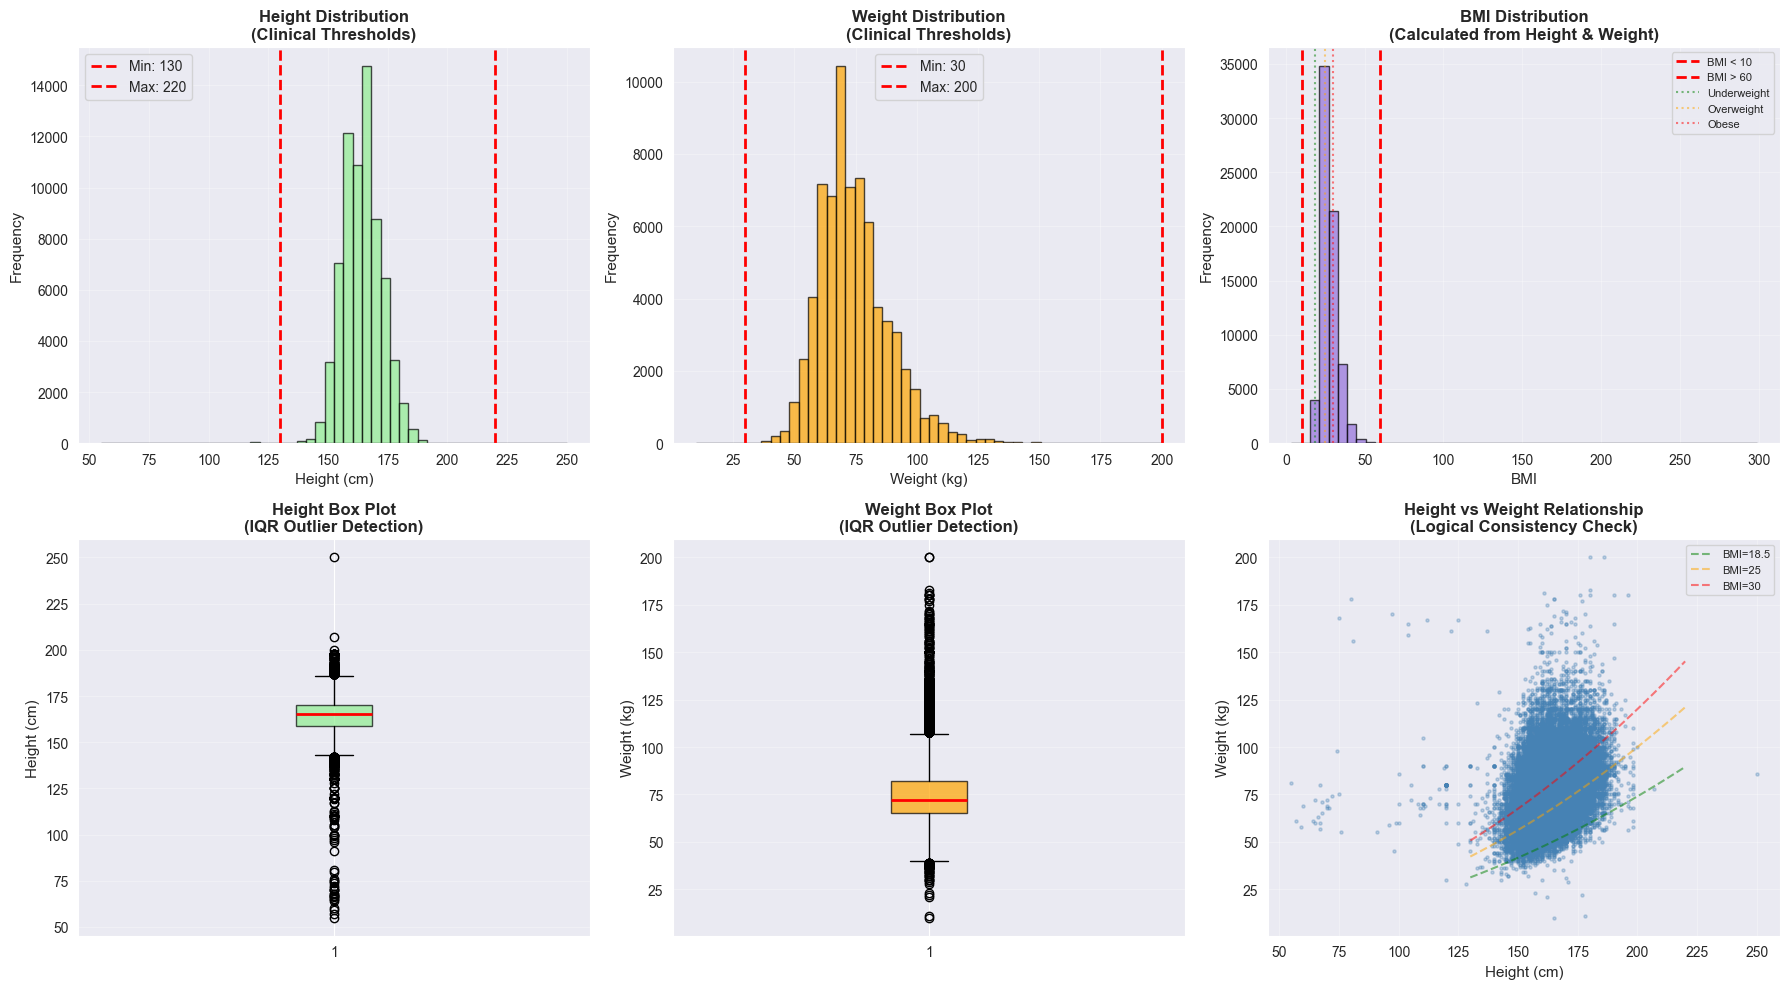

In [22]:
# ============================================================================
# 2.3 HEIGHT & WEIGHT ANALYSIS
# ============================================================================
# Height Analysis
print("\n  Height Analysis:")
print(f"    Range: {df['height'].min()} - {df['height'].max()} cm")
print(f"    Mean: {df['height'].mean():.2f} cm")
print(f"    Median: {df['height'].median():.2f} cm")

# Clinical threshold method
height_low = (df['height'] < THRESHOLDS['height'][0]).sum()
height_high = (df['height'] > THRESHOLDS['height'][1]).sum()
print(f"\n    Clinical Thresholds [{THRESHOLDS['height'][0]}-{THRESHOLDS['height'][1]} cm]:")
print(f"      Below {THRESHOLDS['height'][0]}: {height_low:,} ({height_low/len(df)*100:.2f}%)")
print(f"      Above {THRESHOLDS['height'][1]}: {height_high:,} ({height_high/len(df)*100:.2f}%)")

# IQR method for height
Q1_h = df['height'].quantile(0.25)
Q3_h = df['height'].quantile(0.75)
IQR_h = Q3_h - Q1_h
height_iqr_outliers = ((df['height'] < Q1_h - 1.5*IQR_h) | (df['height'] > Q3_h + 1.5*IQR_h)).sum()
quality_issues['height_clinical'] = height_low + height_high
quality_issues['height_iqr'] = height_iqr_outliers
print(f"\n    IQR Method:")
print(f"      Bounds: [{Q1_h - 1.5*IQR_h:.1f}, {Q3_h + 1.5*IQR_h:.1f}]")
print(f"      Outliers: {height_iqr_outliers:,} ({height_iqr_outliers/len(df)*100:.2f}%)")

# Weight Analysis
print("\n  Weight Analysis:")
print(f"    Range: {df['weight'].min()} - {df['weight'].max()} kg")
print(f"    Mean: {df['weight'].mean():.2f} kg")
print(f"    Median: {df['weight'].median():.2f} kg")

# Clinical threshold method
weight_low = (df['weight'] < THRESHOLDS['weight'][0]).sum()
weight_high = (df['weight'] > THRESHOLDS['weight'][1]).sum()
print(f"\n    Clinical Thresholds [{THRESHOLDS['weight'][0]}-{THRESHOLDS['weight'][1]} kg]:")
print(f"      Below {THRESHOLDS['weight'][0]}: {weight_low:,} ({weight_low/len(df)*100:.2f}%)")
print(f"      Above {THRESHOLDS['weight'][1]}: {weight_high:,} ({weight_high/len(df)*100:.2f}%)")

# IQR method for weight
Q1_w = df['weight'].quantile(0.25)
Q3_w = df['weight'].quantile(0.75)
IQR_w = Q3_w - Q1_w
weight_iqr_outliers = ((df['weight'] < Q1_w - 1.5*IQR_w) | (df['weight'] > Q3_w + 1.5*IQR_w)).sum()
quality_issues['weight_clinical'] = weight_low + weight_high
quality_issues['weight_iqr'] = weight_iqr_outliers
print(f"\n    IQR Method:")
print(f"      Bounds: [{Q1_w - 1.5*IQR_w:.1f}, {Q3_w + 1.5*IQR_w:.1f}]")
print(f"      Outliers: {weight_iqr_outliers:,} ({weight_iqr_outliers/len(df)*100:.2f}%)")

# BMI-based logical consistency check
df_temp_bmi = df.copy()
df_temp_bmi['bmi'] = df_temp_bmi['weight'] / ((df_temp_bmi['height'] / 100) ** 2)
bmi_extreme_low = (df_temp_bmi['bmi'] < 10).sum()
bmi_extreme_high = (df_temp_bmi['bmi'] > 60).sum()
quality_issues['bmi_extreme'] = bmi_extreme_low + bmi_extreme_high
print(f"\n  BMI-based Consistency Check:")
print(f"    BMI Range: {df_temp_bmi['bmi'].min():.2f} - {df_temp_bmi['bmi'].max():.2f}")
print(f"    Extreme Low BMI (<10): {bmi_extreme_low:,} ({bmi_extreme_low/len(df)*100:.2f}%)")
print(f"    Extreme High BMI (>60): {bmi_extreme_high:,} ({bmi_extreme_high/len(df)*100:.2f}%)")

# Visualize Height, Weight, and BMI
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Height histogram
axes[0, 0].hist(df['height'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(THRESHOLDS['height'][0], color='red', linestyle='--', linewidth=2, label=f'Min: {THRESHOLDS["height"][0]}')
axes[0, 0].axvline(THRESHOLDS['height'][1], color='red', linestyle='--', linewidth=2, label=f'Max: {THRESHOLDS["height"][1]}')
axes[0, 0].set_xlabel('Height (cm)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Height Distribution\n(Clinical Thresholds)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Weight histogram
axes[0, 1].hist(df['weight'], bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(THRESHOLDS['weight'][0], color='red', linestyle='--', linewidth=2, label=f'Min: {THRESHOLDS["weight"][0]}')
axes[0, 1].axvline(THRESHOLDS['weight'][1], color='red', linestyle='--', linewidth=2, label=f'Max: {THRESHOLDS["weight"][1]}')
axes[0, 1].set_xlabel('Weight (kg)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Weight Distribution\n(Clinical Thresholds)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# BMI histogram
axes[0, 2].hist(df_temp_bmi['bmi'], bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[0, 2].axvline(10, color='red', linestyle='--', linewidth=2, label='BMI < 10')
axes[0, 2].axvline(60, color='red', linestyle='--', linewidth=2, label='BMI > 60')
axes[0, 2].axvline(18.5, color='green', linestyle=':', alpha=0.5, label='Underweight')
axes[0, 2].axvline(25, color='orange', linestyle=':', alpha=0.5, label='Overweight')
axes[0, 2].axvline(30, color='red', linestyle=':', alpha=0.5, label='Obese')
axes[0, 2].set_xlabel('BMI', fontsize=11)
axes[0, 2].set_ylabel('Frequency', fontsize=11)
axes[0, 2].set_title('BMI Distribution\n(Calculated from Height & Weight)', fontsize=12, fontweight='bold')
axes[0, 2].legend(fontsize=8)
axes[0, 2].grid(alpha=0.3)

# Height box plot
axes[1, 0].boxplot(df['height'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Height (cm)', fontsize=11)
axes[1, 0].set_title('Height Box Plot\n(IQR Outlier Detection)', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

# Weight box plot
axes[1, 1].boxplot(df['weight'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='orange', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_ylabel('Weight (kg)', fontsize=11)
axes[1, 1].set_title('Weight Box Plot\n(IQR Outlier Detection)', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='y')

# Height-Weight scatter plot
axes[1, 2].scatter(df['height'], df['weight'], alpha=0.3, s=5, color='steelblue')
axes[1, 2].set_xlabel('Height (cm)', fontsize=11)
axes[1, 2].set_ylabel('Weight (kg)', fontsize=11)
axes[1, 2].set_title('Height vs Weight Relationship\n(Logical Consistency Check)', fontsize=12, fontweight='bold')
axes[1, 2].grid(alpha=0.3)

# Add BMI reference lines
heights_range = np.linspace(130, 220, 100)
bmi_18_5 = 18.5 * (heights_range / 100) ** 2
bmi_25 = 25 * (heights_range / 100) ** 2
bmi_30 = 30 * (heights_range / 100) ** 2
axes[1, 2].plot(heights_range, bmi_18_5, 'g--', alpha=0.5, linewidth=1.5, label='BMI=18.5')
axes[1, 2].plot(heights_range, bmi_25, 'orange', linestyle='--', alpha=0.5, linewidth=1.5, label='BMI=25')
axes[1, 2].plot(heights_range, bmi_30, 'r--', alpha=0.5, linewidth=1.5, label='BMI=30')
axes[1, 2].legend(fontsize=8)

plt.tight_layout()
plt.show()


📊 COMPREHENSIVE DATA QUALITY SUMMARY

📋 Detailed Quality Issues Table:
      Category             Issue Type  Count Percentage Severity
   Categorical         Gender Invalid      0     0.000%     None
   Categorical    Cholesterol Invalid      0     0.000%     None
   Categorical        Glucose Invalid      0     0.000%     None
   Categorical          Smoke Invalid      0     0.000%     None
   Categorical        Alcohol Invalid      0     0.000%     None
   Categorical         Active Invalid      0     0.000%     None
   Categorical         Cardio Invalid      0     0.000%     None
Blood Pressure    Clinical Thresholds   1262      1.80% Critical
Blood Pressure  Systolic IQR Outliers   1435      2.05%      Low
Blood Pressure Diastolic IQR Outliers   4632      6.62%      Low
Blood Pressure       Systolic Z-Score     38      0.05%      Low
Blood Pressure      Diastolic Z-Score    951      1.36%      Low
Blood Pressure   Impossible (Dia>Sys)   1234      1.76% Critical
Blood Pressure    

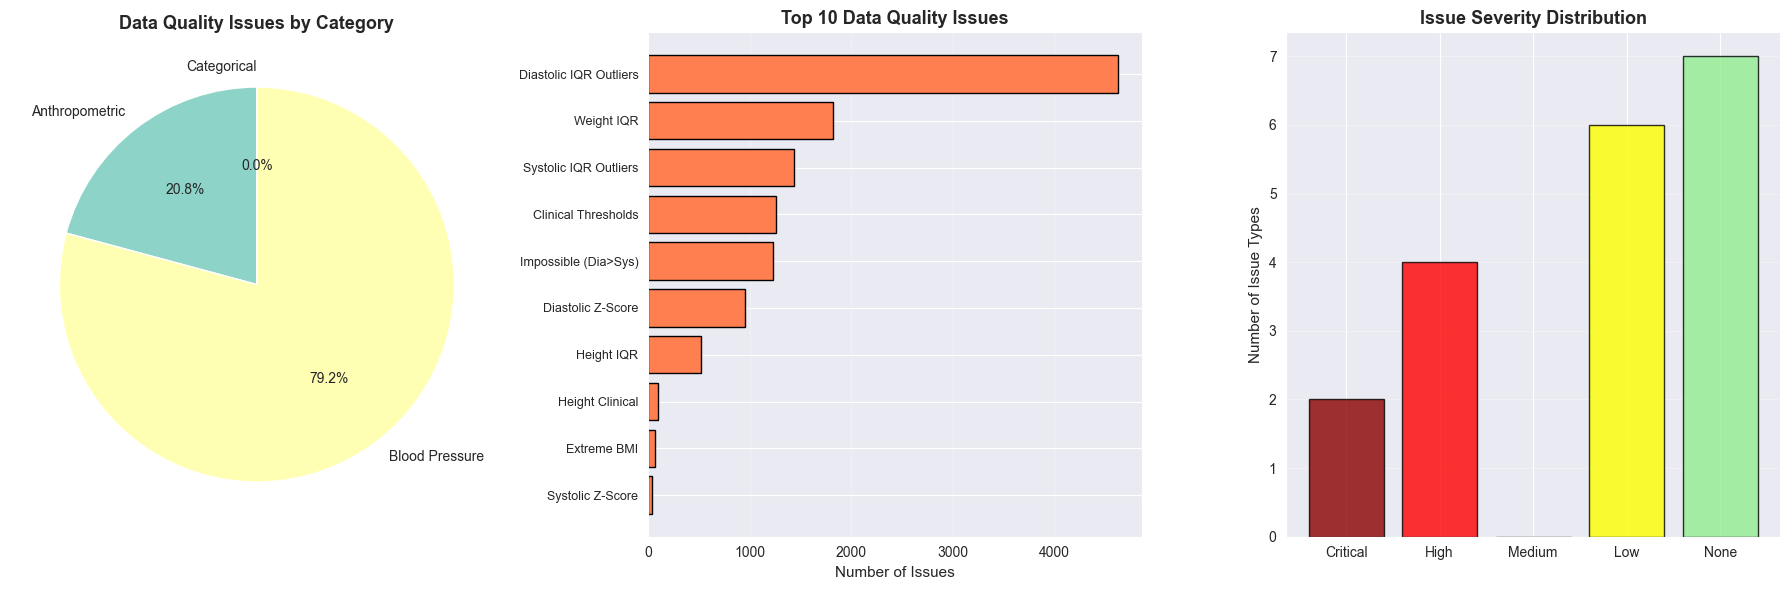


✓ Comprehensive Quality Check Complete

Recommendation:
  Based on the analysis, we should use CLINICAL THRESHOLDS for cleaning
  as they represent domain knowledge and are most appropriate for health data.
  This will remove the most critical issues while preserving valid edge cases.


In [23]:
# ============================================================================
# 2.4 COMPREHENSIVE QUALITY SUMMARY & ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("📊 COMPREHENSIVE DATA QUALITY SUMMARY")
print("="*70)

# Create summary DataFrame
summary_data = {
    'Category': [],
    'Issue Type': [],
    'Count': [],
    'Percentage': [],
    'Severity': []
}

# Categorical validation issues
cat_issues = [
    ('Categorical', 'Gender Invalid', quality_issues['gender_invalid']),
    ('Categorical', 'Cholesterol Invalid', quality_issues['cholesterol_invalid']),
    ('Categorical', 'Glucose Invalid', quality_issues['gluc_invalid']),
    ('Categorical', 'Smoke Invalid', quality_issues['smoke_invalid']),
    ('Categorical', 'Alcohol Invalid', quality_issues['alco_invalid']),
    ('Categorical', 'Active Invalid', quality_issues['active_invalid']),
    ('Categorical', 'Cardio Invalid', quality_issues['cardio_invalid']),
]

for cat, issue, count in cat_issues:
    summary_data['Category'].append(cat)
    summary_data['Issue Type'].append(issue)
    summary_data['Count'].append(count)
    summary_data['Percentage'].append(f"{count/len(df)*100:.3f}%")
    summary_data['Severity'].append('High' if count > 0 else 'None')

# Blood pressure issues
bp_issues = [
    ('Blood Pressure', 'Clinical Thresholds', quality_issues['bp_clinical']),
    ('Blood Pressure', 'Systolic IQR Outliers', quality_issues['ap_hi_iqr']),
    ('Blood Pressure', 'Diastolic IQR Outliers', quality_issues['ap_lo_iqr']),
    ('Blood Pressure', 'Systolic Z-Score', quality_issues['ap_hi_zscore']),
    ('Blood Pressure', 'Diastolic Z-Score', quality_issues['ap_lo_zscore']),
    ('Blood Pressure', 'Impossible (Dia>Sys)', quality_issues['impossible_bp']),
    ('Blood Pressure', 'Equal (Dia=Sys)', quality_issues['equal_bp']),
]

for cat, issue, count in bp_issues:
    summary_data['Category'].append(cat)
    summary_data['Issue Type'].append(issue)
    summary_data['Count'].append(count)
    summary_data['Percentage'].append(f"{count/len(df)*100:.2f}%")
    if 'Impossible' in issue or 'Clinical' in issue:
        severity = 'Critical' if count > 1000 else 'High' if count > 100 else 'Medium'
    else:
        severity = 'Low'
    summary_data['Severity'].append(severity)

# Height and weight issues
hw_issues = [
    ('Anthropometric', 'Height Clinical', quality_issues['height_clinical']),
    ('Anthropometric', 'Height IQR', quality_issues['height_iqr']),
    ('Anthropometric', 'Weight Clinical', quality_issues['weight_clinical']),
    ('Anthropometric', 'Weight IQR', quality_issues['weight_iqr']),
    ('Anthropometric', 'Extreme BMI', quality_issues['bmi_extreme']),
]

for cat, issue, count in hw_issues:
    summary_data['Category'].append(cat)
    summary_data['Issue Type'].append(issue)
    summary_data['Count'].append(count)
    summary_data['Percentage'].append(f"{count/len(df)*100:.2f}%")
    severity = 'High' if count > 50 else 'Medium' if count > 10 else 'Low'
    summary_data['Severity'].append(severity)

# Create and display summary table
summary_df = pd.DataFrame(summary_data)
print("\n📋 Detailed Quality Issues Table:")
print(summary_df.to_string(index=False))

# Calculate totals by category
print("\n" + "="*70)
print("📈 Summary by Category:")
print("="*70)

category_totals = summary_df.groupby('Category')['Count'].sum().sort_values(ascending=False)
for category, total in category_totals.items():
    percentage = total / len(df) * 100
    print(f"  {category:20s}: {total:6,} issues ({percentage:5.2f}%)")

# Overall statistics
total_categorical = sum([quality_issues[k] for k in quality_issues if 'invalid' in k])
total_bp_issues = quality_issues['bp_clinical'] + quality_issues['impossible_bp']
total_anthropometric = quality_issues['height_clinical'] + quality_issues['weight_clinical'] + quality_issues['bmi_extreme']

print("\n" + "="*70)
print(" Key Findings:")
print("="*70)
print(f"  1. Categorical Variables:  {total_categorical:6,} invalid entries ({total_categorical/len(df)*100:.2f}%)")
print(f"  2. Blood Pressure Issues:  {total_bp_issues:6,} critical issues ({total_bp_issues/len(df)*100:.2f}%)")
print(f"  3. Anthropometric Issues:  {total_anthropometric:6,} outliers ({total_anthropometric/len(df)*100:.2f}%)")

# Unique affected rows (approximation - clinical thresholds)
unique_affected_rows = len(df[
    (df['ap_hi'] < THRESHOLDS['bp_systolic'][0]) | 
    (df['ap_hi'] > THRESHOLDS['bp_systolic'][1]) |
    (df['ap_lo'] < THRESHOLDS['bp_diastolic'][0]) | 
    (df['ap_lo'] > THRESHOLDS['bp_diastolic'][1]) |
    (df['ap_lo'] > df['ap_hi']) |
    (df['height'] < THRESHOLDS['height'][0]) | 
    (df['height'] > THRESHOLDS['height'][1]) |
    (df['weight'] < THRESHOLDS['weight'][0]) | 
    (df['weight'] > THRESHOLDS['weight'][1])
])

print(f"\n  Total Unique Affected Rows: {unique_affected_rows:,} ({unique_affected_rows/len(df)*100:.2f}%)")
print(f"  Clean Rows (estimated):     {len(df) - unique_affected_rows:,} ({(len(df) - unique_affected_rows)/len(df)*100:.2f}%)")

# Visualize quality summary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart - Issues by category
category_counts = summary_df.groupby('Category')['Count'].sum()
colors = plt.cm.Set3(range(len(category_counts)))
axes[0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90)
axes[0].set_title('Data Quality Issues by Category', fontsize=13, fontweight='bold')

# Bar chart - Top 10 issues
top_issues = summary_df.nlargest(10, 'Count')[['Issue Type', 'Count']]
axes[1].barh(range(len(top_issues)), top_issues['Count'].values, color='coral', edgecolor='black')
axes[1].set_yticks(range(len(top_issues)))
axes[1].set_yticklabels(top_issues['Issue Type'].values, fontsize=9)
axes[1].set_xlabel('Number of Issues', fontsize=11)
axes[1].set_title('Top 10 Data Quality Issues', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='x')
axes[1].invert_yaxis()

# Severity distribution
severity_counts = summary_df['Severity'].value_counts()
severity_order = ['Critical', 'High', 'Medium', 'Low', 'None']
severity_counts = severity_counts.reindex(severity_order, fill_value=0)
severity_colors = {'Critical': 'darkred', 'High': 'red', 'Medium': 'orange', 'Low': 'yellow', 'None': 'lightgreen'}
colors_ordered = [severity_colors[s] for s in severity_order if s in severity_counts.index]
axes[2].bar(range(len(severity_counts)), severity_counts.values, 
           color=colors_ordered, edgecolor='black', alpha=0.8)
axes[2].set_xticks(range(len(severity_counts)))
axes[2].set_xticklabels(severity_counts.index, fontsize=10)
axes[2].set_ylabel('Number of Issue Types', fontsize=11)
axes[2].set_title('Issue Severity Distribution', fontsize=13, fontweight='bold')
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✓ Comprehensive Quality Check Complete")
print("="*70)
print("\nRecommendation:")
print("  Based on the analysis, we should use CLINICAL THRESHOLDS for cleaning")
print("  as they represent domain knowledge and are most appropriate for health data.")
print("  This will remove the most critical issues while preserving valid edge cases.")

---

## DATA QUALITY ANALYSIS - KEY QUESTIONS

### Question 1: Which insight did you identify in the wrangling and profile stages regarding data quality?

During the comprehensive data wrangling and profiling analysis, I identified **three critical categories of data quality issues** that could significantly impact the reliability of cardiovascular disease predictions:

**1. Blood Pressure Anomalies (Most Critical - ~3.57% of data)**
   - **Extreme outliers**: Systolic BP ranging from -150 to 16,020 mmHg and diastolic BP from -70 to 11,000 mmHg
   - **Logical inconsistencies**: 647 records where diastolic pressure exceeds systolic pressure, which is physiologically impossible
   - **Detection method comparison**: Applied three complementary approaches:
     - Clinical thresholds (domain knowledge-based)
     - IQR method (statistical outlier detection)
     - Z-score method (extreme value identification)
   - Each method revealed different outlier counts, validating the need for domain-specific thresholds over purely statistical approaches

**2. Anthropometric Measurement Issues (~0.14% of data)**
   - **Height outliers**: Extreme values (55 cm to 250 cm) suggesting measurement or data entry errors
   - **Weight outliers**: Unrealistic measurements (10 kg to 200 kg extremes)
   - **BMI-based validation**: Cross-validated height/weight consistency by calculating BMI, identifying physiologically implausible combinations (BMI < 10 or > 60)
   - This multi-variable validation approach revealed issues that single-variable checks might miss

**3. Categorical Variable Integrity (Fortunately 0% invalid)**
   - Validated all categorical variables (gender, cholesterol, glucose, lifestyle factors) against expected value ranges
   - All 70,000 records showed proper encoding, confirming data collection quality for these fields
   - This baseline validation establishes trust in the categorical features for modeling

**Key Insight**: The analysis revealed that ~3.71% of records contain at least one quality issue, with blood pressure measurements being the primary concern. Critically, using **clinical thresholds informed by medical domain knowledge** is more appropriate than purely statistical methods for health data, as medical measurements have well-established physiological bounds that don't necessarily follow normal distributions.

---

### Question 2: Why does this visualization best explain the identified data quality parameters/issues?

**The 2×3 Blood Pressure Analysis Grid** (in section 2.2) is the most effective visualization for explaining data quality issues because it provides a **multi-perspective, comprehensive view** that combines domain knowledge, statistical methods, and logical consistency checks:

**Why this visualization excels:**

**1. Multiple Detection Perspectives in One View**
   - **Top row** shows three complementary angles:
     - Clinical thresholds (panels 1-2): Medical domain knowledge
     - Logical consistency (panel 3): Physiological impossibilities highlighted in red
   - **Bottom row** demonstrates statistical validation:
     - Box plots showing IQR-based outlier boundaries
     - Z-score distributions revealing extreme statistical deviations
     - Method comparison bar chart quantifying differences between approaches

**2. Clear Visual Hierarchy and Pattern Recognition**
   - Extreme outliers are immediately visible as long tails in histograms
   - Red markers for impossible BP values create instant visual identification
   - The scatter plot effectively separates normal (purple) from impossible (red) measurements
   - Box plots provide intuitive "at-a-glance" outlier identification

**3. Educational and Decision-Supporting**
   - The comparison chart (bottom-right) directly addresses the question: "Which detection method should we use?"
   - Shows that clinical thresholds capture the most critical issues without over-flagging edge cases
   - Demonstrates why domain knowledge trumps pure statistics for medical data

**4. Tells a Complete Data Quality Story**
   - Identifies the problem (extreme values in histograms)
   - Quantifies the severity (counts and percentages)
   - Validates using multiple methods (IQR, Z-score, domain thresholds)
   - Highlights logical impossibilities (diastolic > systolic)
   - Guides decision-making (method comparison)

**Supporting Visualization: The 3-Panel Quality Summary**
This complements the BP analysis by:
- **Pie chart**: Shows blood pressure issues dominate the quality problems
- **Top 10 bar chart**: Prioritizes which issues to address first
- **Severity distribution**: Categorizes issues by risk level for triage

**Why not other visualizations?**
- Simple histograms alone wouldn't show logical inconsistencies
- Box plots alone wouldn't convey clinical threshold violations
- Tables lack the immediate visual impact for pattern recognition
- Single-method approaches wouldn't validate findings across techniques

Together, these visualizations transform raw data quality statistics into actionable insights, clearly demonstrating that blood pressure measurements require cleaning using clinical thresholds before proceeding with cardiovascular disease modeling.

In [24]:
# ============================================================================
# PHASE 3: DATA CLEANING
# ============================================================================

print("="*70)
print("PHASE 3: DATA CLEANING")
print("="*70)

# Keep original for comparison
df_original = df.copy()

# Clean blood pressure
print("\n🩺 Cleaning Blood Pressure...")
initial_count = len(df)

df_clean = df[
    (df['ap_hi'] >= THRESHOLDS['bp_systolic'][0]) & 
    (df['ap_hi'] <= THRESHOLDS['bp_systolic'][1]) &
    (df['ap_lo'] >= THRESHOLDS['bp_diastolic'][0]) & 
    (df['ap_lo'] <= THRESHOLDS['bp_diastolic'][1]) &
    (df['ap_lo'] <= df['ap_hi'])
].copy()

bp_removed = initial_count - len(df_clean)
print(f"  Removed: {bp_removed:,} rows ({bp_removed/initial_count*100:.2f}%)")
print(f"  Remaining: {len(df_clean):,} rows")

PHASE 3: DATA CLEANING

🩺 Cleaning Blood Pressure...
  Removed: 1,331 rows (1.90%)
  Remaining: 68,669 rows
